In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

/home/harsh/Work/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 43.3M/43.3M [00:11<00:00, 3.83MB/s]

Extracting files...


Path to dataset files: /home/harsh/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
data_path = path+"/online_retail_II.xlsx"


'/home/harsh/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx'

In [14]:
df1 = pd.read_excel(data_path, sheet_name="Year 2009-2010")
df2 = pd.read_excel(data_path, sheet_name="Year 2010-2011")
df = pd.concat([df1, df2])

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


(None,
            Quantity                    InvoiceDate         Price  \
 count  1.067371e+06                        1067371  1.067371e+06   
 mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
 min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
 25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
 50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
 75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
 max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
 std    1.727058e+02                            NaN  1.235531e+02   
 
          Customer ID  
 count  824364.000000  
 mean    15324.638504  
 min     12346.000000  
 25%     13975.000000  
 50%     15255.000000  
 75%     16797.000000  
 max     18287.000000  
 std      1697.464450  )

In [16]:
df = df.dropna(subset=["Customer ID"])
df = df[df["Quantity"] > 0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["Price"]


In [17]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
customer_df = df.groupby("Customer ID").agg({
    "InvoiceDate": [lambda x: (snapshot_date - x.min()).days, lambda x: (snapshot_date - x.max()).days],
    "Invoice": "nunique",
    "Quantity": "sum",
    "TotalPrice": "sum"
})
customer_df.columns = ["Customer_Age", "Recency", "Frequency", "Total_Units", "Monetary"]
customer_df = customer_df.reset_index()


In [18]:
X = customer_df[["Customer_Age", "Recency", "Frequency", "Total_Units"]]
y = customer_df["Monetary"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 12935.85


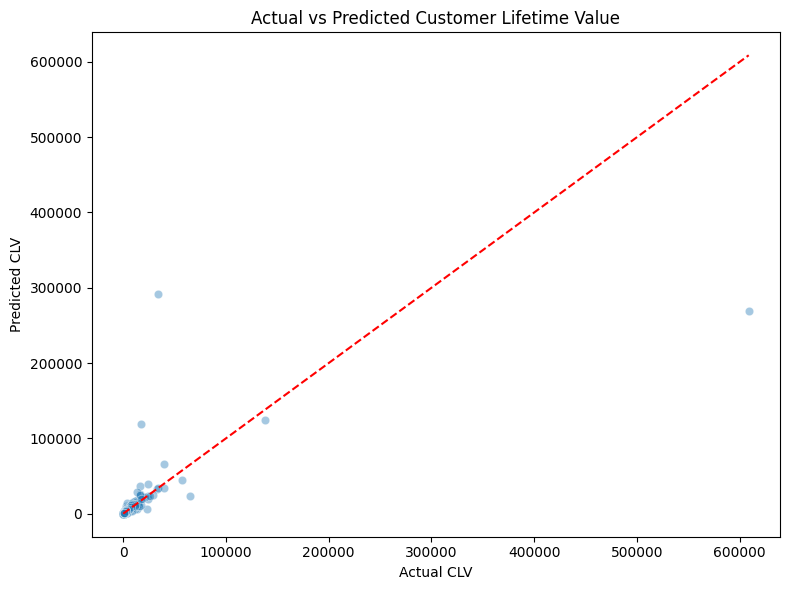

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.tight_layout()
plt.show()


In [ ]:
X_raw = customer_df[["Customer_Age", "Recency", "Frequency", "Total_Units"]]
y = customer_df["Monetary"]
customer_ids = customer_df["Customer ID"]

X_train_raw, X_test_raw, y_train, y_test, ids_train, ids_test = train_test_split(
    X_raw, y, customer_ids, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

submission_df = pd.DataFrame({
    "Customer ID": ids_test,
    "Predicted_CLV": y_pred
})
submission_df.to_csv("submission.csv", index=False)
submission_df.head()


,Customer ID,Predicted_CLV
5371,17776.0,253.284079
5299,17703.0,1386.839313
199,12546.0,1053.084147
3268,15643.0,617.960786
3504,15881.0,955.253556
